About Dataset
This dataset is for ABC Multistate bank with following columns:

1. customer_id
2. credit_score
3. country
4. gender
5. age
6. tenure (From how many years he/she is having bank acc in ABC Bank)
7. balance
8. products_number(Number of Product from bank)
9. credit_card
10. active_member
11. estimated_salary
12. churn(1 if the client has left the bank during some period or 0 if he/she has not)


Objective: Predict the Customer Churn for ABC Bank
 
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# importing data

df = pd.read_csv(r"C:\Users\user\Desktop\Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum() 

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [9]:
df.drop(['customer_id'],axis=1,inplace=True)

In [11]:
vc = df[['churn', 'credit_card',
       'active_member']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

,Col_Name,Value_Count_1,Value_Count_0
0,churn,2037,7963
1,credit_card,7055,2945
2,active_member,5151,4849


In [19]:
df['gender'] = df['gender'].astype('category')
df['country'] = df['country'].astype('category')

In [36]:
# seperate the independent variables
X = df.loc[:, df.columns != 'churn']  # independent variables

y = df.loc[:, df.columns == 'churn']

In [37]:
X = pd.get_dummies(X,drop_first=True)
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)
X_train.shape,X_test.shape

((7000, 11), (3000, 11))

In [40]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ROCAUC

In [59]:
def logistic_regression(X_train, X_test, y_train, y_test):
    algo= []
    tr = []
    te = []
    recall = []
    precision = []
    roc = []
    model = LogisticRegression(random_state=7,C=10)
    model.fit(X_train, y_train)
    y_pred_class=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)
    print('\ny_predicted class =',y_pred_class[:5])
    print('\ny_predicted probability =',y_pred_prob[:5,:])
    def draw_cm( actual, predicted ):
        cm = confusion_matrix( actual, predicted)
        sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
        plt.ylabel('Observed')
        plt.xlabel('Predicted')
        plt.show()
    draw_cm(y_test,y_pred_class) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1]) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
    roc_df.columns=['fpr','tpr','thresholds']
    print(roc_df)
    algo.append('Logistic Regression')
    tr.append(model.score(X_train, y_train))
    te.append(model.score(X_test, y_test))
    recall.append(recall_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test,model.predict(X_test)))
    roc.append(roc_auc_score(y_test,model.predict(X_test)))
    results = pd.DataFrame()
    results['Model'] = algo
    results['Training Score'] = tr
    results['Testing Score'] = te
    results['Recall'] = recall
    results['Precision'] = precision
    results['ROC AUC Score'] = roc
    results = results.set_index('Model')
    print(results)


y_predicted class = [0 0 0 0 0]

y_predicted probability = [[0.75297726 0.24702274]
 [0.88685229 0.11314771]
 [0.91327126 0.08672874]
 [0.78750843 0.21249157]
 [0.72097783 0.27902217]]


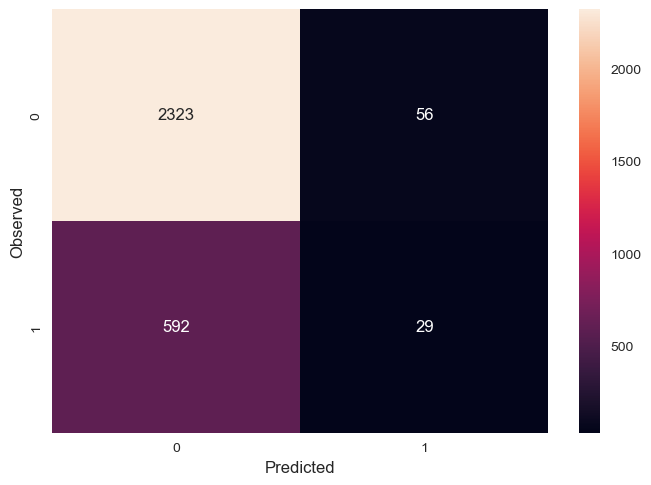

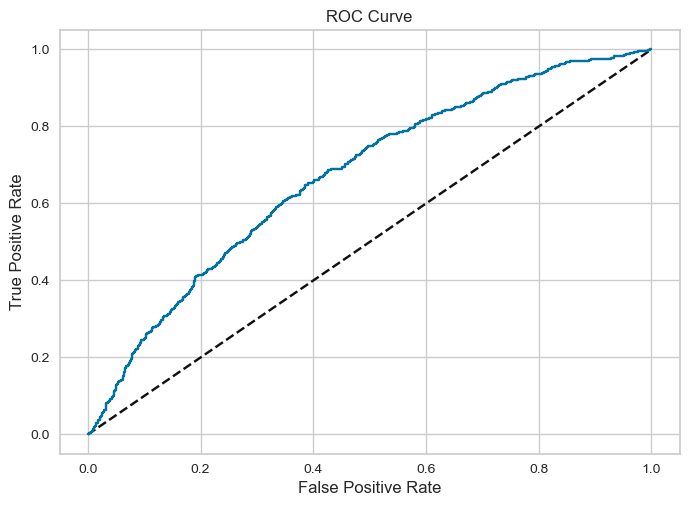

          fpr       tpr  thresholds
0    0.000000  0.000000    1.846292
1    0.000000  0.001610    0.846292
2    0.002942  0.001610    0.675552
3    0.002942  0.003221    0.658677
4    0.006305  0.003221    0.614442
..        ...       ...         ...
936  0.994115  0.996779    0.042234
937  0.994115  0.998390    0.041852
938  0.997898  0.998390    0.036321
939  0.997898  1.000000    0.036040
940  1.000000  1.000000    0.028560

[941 rows x 3 columns]
                     Training Score  Testing Score    Recall  Precision  \
Model                                                                     
Logistic Regression        0.792714          0.784  0.046699   0.341176   

                     ROC AUC Score  
Model                               
Logistic Regression        0.51158  


In [60]:
logistic_regression(X_train, X_test, y_train, y_test)

the results obtained are not good

In [55]:
# L1 regularization

def logistic_regression_L1(X_train, X_test, y_train, y_test):
    algo= []
    tr = []
    te = []
    recall = []
    precision = []
    roc = []
    model = LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=7,)
    model.fit(X_train, y_train)
    y_pred_class=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)
    print('\ny_predicted class =',y_pred_class[:5])
    print('\ny_predicted probability =',y_pred_prob[:5,:])
    def draw_cm( actual, predicted ):
        cm = confusion_matrix( actual, predicted)
        sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
        plt.ylabel('Observed')
        plt.xlabel('Predicted')
        plt.show()
    draw_cm(y_test,y_pred_class) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1]) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
    roc_df.columns=['fpr','tpr','thresholds']
    print(roc_df)
    algo.append('Logistic Regression')
    tr.append(model.score(X_train, y_train))
    te.append(model.score(X_test, y_test))
    recall.append(recall_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test,model.predict(X_test)))
    roc.append(roc_auc_score(y_test,model.predict(X_test)))
    results = pd.DataFrame()
    results['Model'] = algo
    results['Training Score'] = tr
    results['Testing Score'] = te
    results['Recall'] = recall
    results['Precision'] = precision
    results['ROC AUC Score'] = roc
    results = results.set_index('Model')
    print(results)


y_predicted class = [0 0 0 0 0]

y_predicted probability = [[0.82858225 0.17141775]
 [0.92488827 0.07511173]
 [0.87710286 0.12289714]
 [0.57117319 0.42882681]
 [0.73158058 0.26841942]]


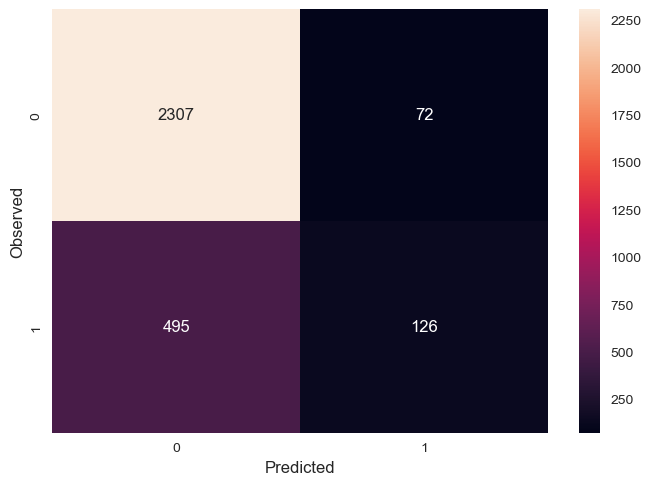

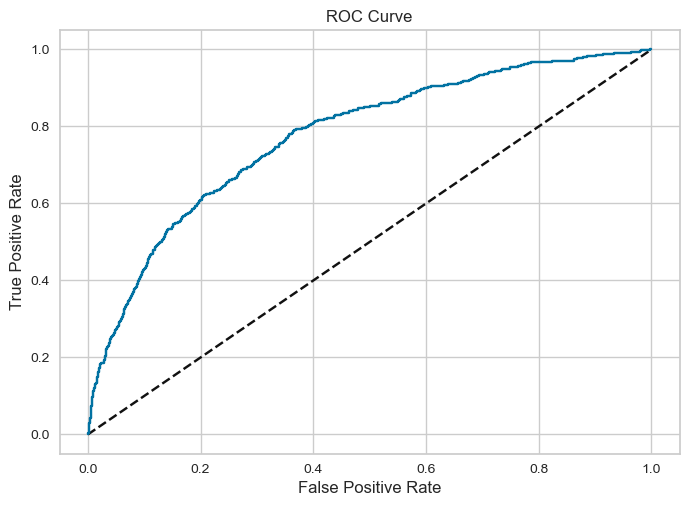

          fpr       tpr  thresholds
0    0.000000  0.000000    1.920368
1    0.000000  0.001610    0.920368
2    0.000841  0.001610    0.825550
3    0.000841  0.003221    0.817119
4    0.001681  0.003221    0.790916
..        ...       ...         ...
804  0.981084  0.996779    0.025769
805  0.981084  0.998390    0.025736
806  0.997478  0.998390    0.018260
807  0.997478  1.000000    0.017873
808  1.000000  1.000000    0.012870

[809 rows x 3 columns]
                     Training Score  Testing Score    Recall  Precision  \
Model                                                                     
Logistic Regression        0.812571          0.811  0.202899   0.636364   

                     ROC AUC Score  
Model                               
Logistic Regression       0.586317  


In [56]:
logistic_regression_L1(X_train, X_test, y_train, y_test)

In [50]:
# Elasticnet regularization

def logistic_regression_elasticnet(X_train, X_test, y_train, y_test):
    algo= []
    tr = []
    te = []
    recall = []
    precision = []
    roc = []
    model = LogisticRegression(penalty='elasticnet',C=10,solver='saga',random_state=7,l1_ratio=0.1)
    model.fit(X_train, y_train)
    y_pred_class=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)
    print('\ny_predicted class =',y_pred_class[:5])
    print('\ny_predicted probability =',y_pred_prob[:5,:])
    def draw_cm( actual, predicted ):
        cm = confusion_matrix( actual, predicted)
        sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
        plt.ylabel('Observed')
        plt.xlabel('Predicted')
        plt.show()
    draw_cm(y_test,y_pred_class) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1]) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
    roc_df.columns=['fpr','tpr','thresholds']
    print(roc_df)
    algo.append('Logistic Regression')
    tr.append(model.score(X_train, y_train))
    te.append(model.score(X_test, y_test))
    recall.append(recall_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test,model.predict(X_test)))
    roc.append(roc_auc_score(y_test,model.predict(X_test)))
    results = pd.DataFrame()
    results['Model'] = algo
    results['Training Score'] = tr
    results['Testing Score'] = te
    results['Recall'] = recall
    results['Precision'] = precision
    results['ROC AUC Score'] = roc
    results = results.set_index('Model')
    print(results)


y_predicted class = [0 0 0 0 0]

y_predicted probability = [[0.83853884 0.16146116]
 [0.71174326 0.28825674]
 [0.65652579 0.34347421]
 [0.86342464 0.13657536]
 [0.86261916 0.13738084]]


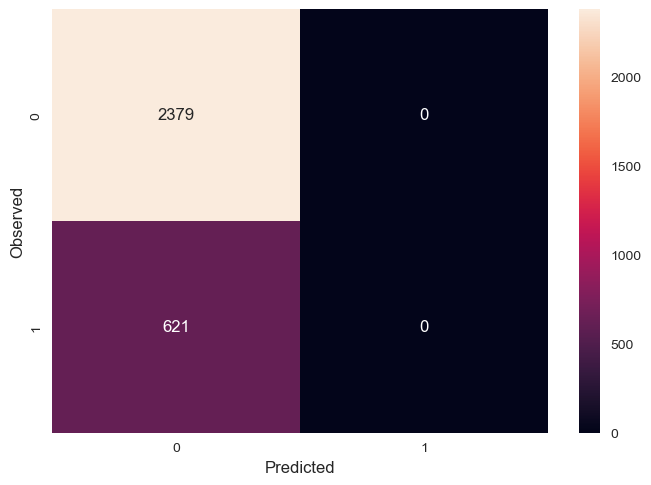

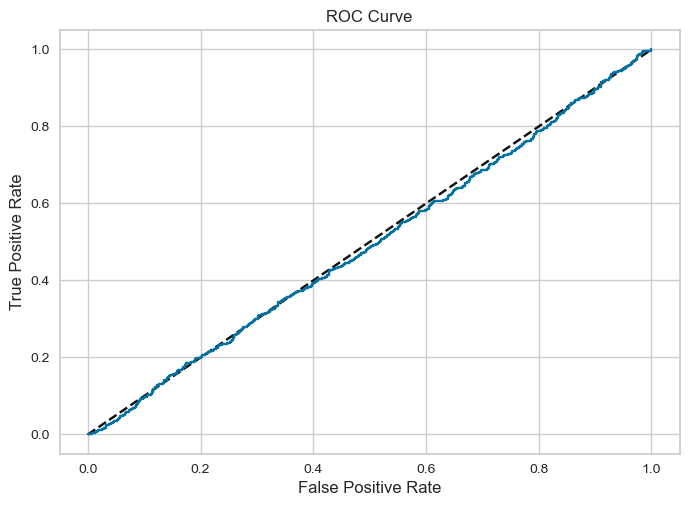

           fpr       tpr  thresholds
0     0.000000  0.000000    1.426850
1     0.000420  0.000000    0.426850
2     0.001681  0.000000    0.417954
3     0.001681  0.001610    0.416927
4     0.007146  0.001610    0.407527
...        ...       ...         ...
997   0.989071  0.996779    0.130110
998   0.999159  0.996779    0.122786
999   0.999159  0.998390    0.122008
1000  1.000000  0.998390    0.120675
1001  1.000000  1.000000    0.118777

[1002 rows x 3 columns]
                     Training Score  Testing Score  Recall  Precision  \
Model                                                                   
Logistic Regression        0.797714          0.793     0.0        0.0   

                     ROC AUC Score  
Model                               
Logistic Regression            0.5  


In [51]:
logistic_regression_elasticnet(X_train, X_test, y_train, y_test)